# Analysis of Stocks - Daily Returns

##  Objective 

### The key statistical concepts that will be explored this notebook are:

- Probability Distribution
- Normal Distribution
- Significance of mean and standard deviation
- Confidence Interval
- Outlier events

### Datasets 

We will use the following real world data for this notebook.

- Daily stock prices of **ICICI Bank and Yes Bank**
- For the period of **01 October 2022 to 07 March 2023**
- The dails stock price data can be downloaded from **BSE India Site**

https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0

#### We will explore some of the basic insights like:

- What is the value at risk (VaR)?

Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability), given normal market conditions, in a set time period such as a day. (https://en.wikipedia.org/wiki/Value_at_risk)

- What is the probability of making a certain percetage of profit or loss if invested in a stock for a specified duration of time?

- How basic statistical analysis helps answer the above questions?

## Read the dataset

- Explore the pandas, seaborn documentation page

    - [Pandas Home Page](https://pandas.pydata.org/)
    - [Matplotlib Home Page](https://matplotlib.org/)
    - [Seaborn Home Page](https://seaborn.pydata.org/)


In [ ]:
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn

### Check the library versions

In [ ]:
pd.__version__

'1.4.4'

In [ ]:
mplot.__version__

'3.7.1'

In [ ]:
sn.__version__

'0.12.2'

### Load ICICI Bank Data

- Read different kinds of data formats

https://pandas.pydata.org/docs/user_guide/io.html

In [ ]:
icici_df = pd.read_csv( 'https://raw.githubusercontent.com/manaranjanp/MLCourseV1/main/Session_1/ICICI.csv', 
                       parse_dates=['Date'] )

In [ ]:
type(icici_df)

A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet. DataFrames are one of the most common data structures used in modern data analytics because they are a flexible and intuitive way of storing and working with data.

Source: [What is a DataFrame](https://www.databricks.com/glossary/what-are-dataframes#:~:text=What%20is%20a%20DataFrame%3F,storing%20and%20working%20with%20data.)

#### Show few records

In [ ]:
icici_df.head( 5 )

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2023-03-06,873.80,876.50,865.60,867.95,871.256330,165396,7772,144102312.0,76949.0,46.52,10.90,-5.85
1,2023-03-03,855.05,873.00,849.85,868.80,865.532334,177353,5219,153504756.0,73785.0,41.60,23.15,13.75
2,2023-03-02,854.30,861.85,851.00,853.95,857.834905,89942,3357,77155387.0,38971.0,43.33,10.85,-0.35
3,2023-03-01,861.55,861.90,852.00,856.05,857.317703,95709,3624,82053020.0,31041.0,32.43,9.90,-5.50
4,2023-02-28,856.30,857.85,850.05,854.65,853.431155,159604,7878,136211026.0,66312.0,41.55,7.80,-1.65


#### How many rows and columns?

In [ ]:
icici_df.shape

(107, 13)

In [ ]:
icici_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       107 non-null    datetime64[ns]
 1   Open Price                 107 non-null    float64       
 2   High Price                 107 non-null    float64       
 3   Low Price                  107 non-null    float64       
 4   Close Price                107 non-null    float64       
 5   WAP                        107 non-null    float64       
 6   No.of Shares               107 non-null    int64         
 7   No. of Trades              107 non-null    int64         
 8   Total Turnover (Rs.)       107 non-null    float64       
 9   Deliverable Quantity       105 non-null    float64       
 10  % Deli. Qty to Traded Qty  105 non-null    float64       
 11  Spread High-Low            107 non-null    float64       
 12  Spread C

### Time Series Data

This data is time series based. It makes sense to index the data based on timestamp.

In [ ]:
icici_df = icici_df.set_index(['Date'], drop=True)

In [ ]:
icici_df.head(5)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2023-03-06,873.80,876.50,865.60,867.95,871.256330,165396,7772,144102312.0,76949.0,46.52,10.90,-5.85
2023-03-03,855.05,873.00,849.85,868.80,865.532334,177353,5219,153504756.0,73785.0,41.60,23.15,13.75
2023-03-02,854.30,861.85,851.00,853.95,857.834905,89942,3357,77155387.0,38971.0,43.33,10.85,-0.35
2023-03-01,861.55,861.90,852.00,856.05,857.317703,95709,3624,82053020.0,31041.0,32.43,9.90,-5.50
2023-02-28,856.30,857.85,850.05,854.65,853.431155,159604,7878,136211026.0,66312.0,41.55,7.80,-1.65


#### Sort the data based on ascending order of timestamp

In [ ]:
icici_df.sort_index(ascending = True, inplace=True)

### Slicing and indexing

- How to slice, dice, and get subsets of pandas rows and columns.

In [ ]:
icici_df[0:5]

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2022-10-03,860.0,860.50,846.05,848.05,851.947326,221153,10664,188410707.0,96202.0,43.50,14.45,-11.95
2022-10-04,862.0,872.35,862.00,867.65,868.406652,479617,6845,416502593.0,392664.0,81.87,10.35,5.65
2022-10-06,870.0,891.50,870.00,885.35,883.572212,347955,11178,307443369.0,237511.0,68.26,21.50,15.35
2022-10-07,876.4,884.40,873.15,882.00,877.454049,117485,3509,103087689.0,64226.0,54.67,11.25,5.60
2022-10-10,869.1,889.65,869.10,881.50,882.149263,652092,12228,575242477.0,548131.0,84.06,20.55,12.40


In [ ]:
icici_df[-5:]

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2023-02-28,856.30,857.85,850.05,854.65,853.431155,159604,7878,136211026.0,66312.0,41.55,7.80,-1.65
2023-03-01,861.55,861.90,852.00,856.05,857.317703,95709,3624,82053020.0,31041.0,32.43,9.90,-5.50
2023-03-02,854.30,861.85,851.00,853.95,857.834905,89942,3357,77155387.0,38971.0,43.33,10.85,-0.35
2023-03-03,855.05,873.00,849.85,868.80,865.532334,177353,5219,153504756.0,73785.0,41.60,23.15,13.75
2023-03-06,873.80,876.50,865.60,867.95,871.256330,165396,7772,144102312.0,76949.0,46.52,10.90,-5.85


### Select columns

In [ ]:
icici_df = icici_df[['Close Price', 'Open Price']]

In [ ]:
icici_df[0:5]

,Close Price,Open Price
Date,,
2022-10-03,848.05,860.0
2022-10-04,867.65,862.0
2022-10-06,885.35,870.0
2022-10-07,882.00,876.4
2022-10-10,881.50,869.1


### Load Yes Bank Data

In [ ]:
# Read the csv file
yes_df = pd.read_csv('https://raw.githubusercontent.com/manaranjanp/MLCourseV1/main/Session_1/Yes.csv',
                     parse_dates=['Date'] )

# Set the time index 
yes_df = yes_df.set_index(['Date'], drop=True)

# Sort the records based on time
yes_df.sort_index(ascending = True, inplace=True)

# Select only Close and Open Price columns for further analysis
yes_df = yes_df[['Close Price', 'Open Price']]

# Print Few Records
yes_df.head( 5 )

,Close Price,Open Price
Date,,
2022-10-03,15.40,15.65
2022-10-04,16.20,15.60
2022-10-06,16.50,16.30
2022-10-07,16.50,16.65
2022-10-10,16.45,16.35


### Calculate daily gains


- Calculate daily gain or loss in terms of percentage 

$$ gain = {(Close Price - Open Price) * 100 \over Open Price} $$


In [ ]:
icici_df["gain"] = ((icici_df['Close Price'] - icici_df['Open Price']) * 100 /
                    icici_df['Open Price'])

In [ ]:
icici_df.head( 5 )

,Close Price,Open Price,gain
Date,,,
2022-10-03,848.05,860.0,-1.389535
2022-10-04,867.65,862.0,0.655452
2022-10-06,885.35,870.0,1.764368
2022-10-07,882.00,876.4,0.638978
2022-10-10,881.50,869.1,1.426763


In [ ]:
yes_df["gain"] = ((yes_df['Close Price'] - yes_df['Open Price']) * 100 / 
                  yes_df['Open Price'])

In [ ]:
yes_df[0:5]

,Close Price,Open Price,gain
Date,,,
2022-10-03,15.40,15.65,-1.597444
2022-10-04,16.20,15.60,3.846154
2022-10-06,16.50,16.30,1.226994
2022-10-07,16.50,16.65,-0.900901
2022-10-10,16.45,16.35,0.611621


## Plotting Historical Price Trends 

For plotting the price trends we will plot the close price on time scale.
The figure size can be set using figsize

**figsize(width, height)**
    - Width, height in inches.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

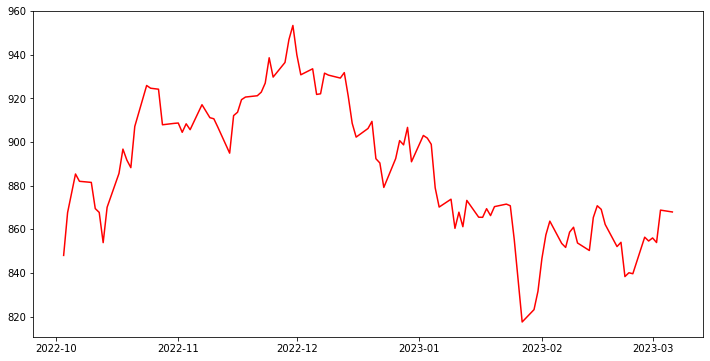

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(icici_df['Close Price'], color = 'r');

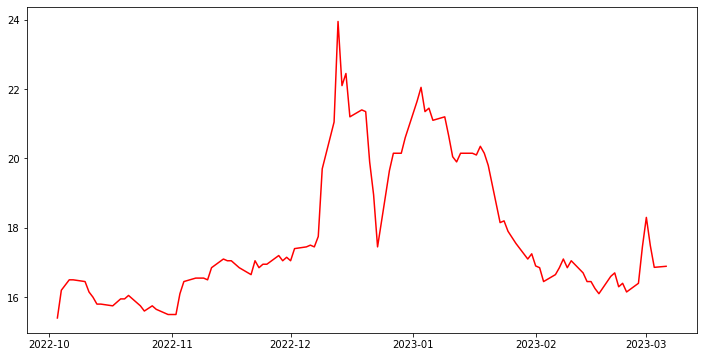

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(yes_df['Close Price'], color = 'r');

- From December 2022, the stock prices have fallen and reached the october 2022 levels.

- But our focus will be on daily gains here .e.g how much gain or loss if remain invested for a day.

## Plotting Daily Gains

How much the stock price changes every day. Is there any pattern in the change of price?

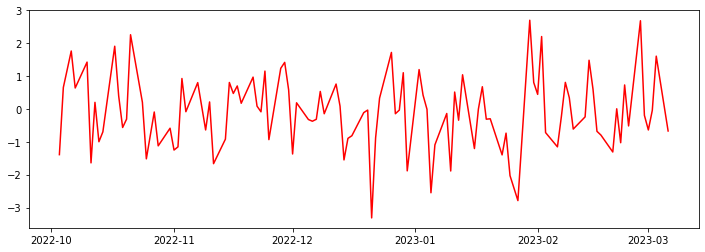

In [ ]:
plt.figure(figsize = (12, 4))
plt.plot( icici_df.gain, 'r' );

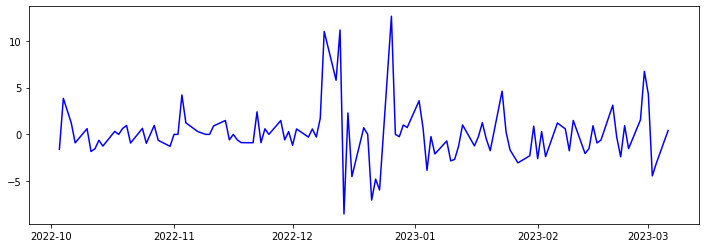

In [ ]:
plt.figure(figsize = (12, 4))
plt.plot( yes_df.gain, 'b' );

### Calculating min and max gains

In [ ]:
icici_df.gain.min(), icici_df.gain.max()

(-3.31545587518284, 2.7010167799887834)

In [ ]:
yes_df.gain.min(), yes_df.gain.max()

(-8.488612836438913, 12.607449856733522)

### What is stock volatility?
- Volatility is the rate at which the price of a stock increases or decreases over a particular period.

- Higher stock price volatility often means higher risk and helps an investor to estimate the fluctuations that may happen in the future.

Source: [Stock Volatility](https://www.fidelity.com.sg/beginners/your-guide-to-stock-investing/understanding-stock-market-volatility-and-how-it-could-help-you#:~:text=Volatility%20is%20the%20standard%20deviation,said%20to%20have%20high%20volatility.)

### Plotting frequency of various gain values

- How many times (in terms of frequency) we are observing different values of gain or loss? 
    - Frequenecy of -2% to -1% loss 
    - Frequenecy of -1% to 0% loss 
    - Frequenecy of 0% to 1% gain 
    - Frequenecy of 1% to 2% gain
    - and so on

- Do we observe very high gain or loss very frequently or this is a rare event?

- A **histogram** can show the frequency of data items in successive numerical intervals of equal size. 

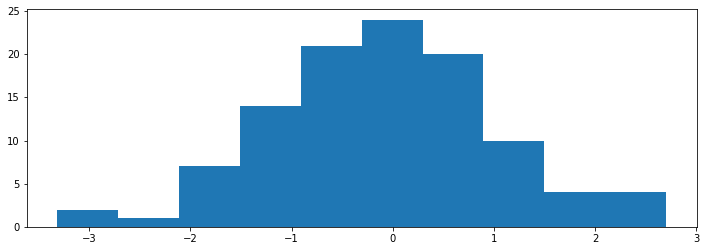

In [ ]:
plt.figure(figsize = (12, 4))
plt.hist(icici_df.gain);

- The bin intervals are calculated by dividing the difference of max and min value by 10. By default it creates 10 equal sized bins.
- We can create our own bins to make the histogram more readable.
- Create bins from -4.0 to +4.0 with bin size of 1.0 and show frequencey for each bin

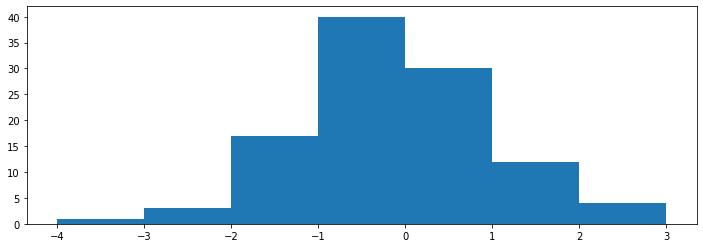

In [ ]:
plt.figure(figsize = (12, 4))
plt.hist(icici_df.gain, bins = range(-4, 4, 1));

#### Note:

- What is the probability of the stock making a gain of (0% to 1%)?
- What is the probability of the stock making a loss of (0% to -1%)?

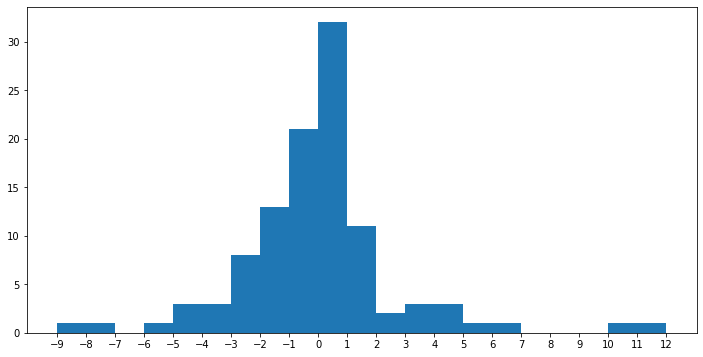

In [ ]:
plt.figure(figsize = (12, 6))
plt.hist(yes_df.gain, bins = range(-9, 13, 1));
plt.xticks(range(-9, 13, 1));

### Plotting Distribution Plots

In the probability distribution curve, the x-axis indicates the possible values and y-axis indicates the probability of that value occuring.

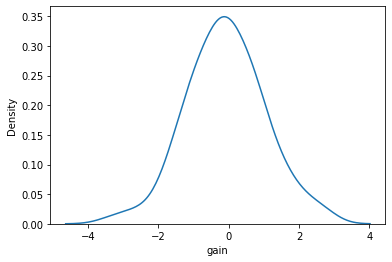

In [ ]:
sn.kdeplot(icici_df.gain);

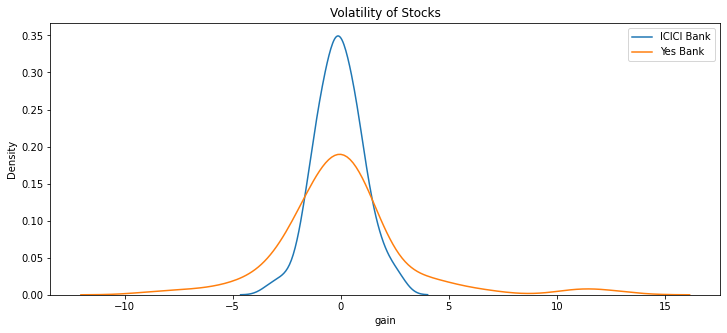

In [ ]:
plt.figure(figsize = (12, 5))
sn.kdeplot(icici_df.gain, label = 'ICICI Bank' );
sn.kdeplot(yes_df.gain, label = 'Yes Bank' );
plt.title("Volatility of Stocks")
plt.legend();

#### Note:
   - Yes Bank has higher dispersion than ICICI Bank, which indicates it is higher volatile.
   - But can we measure volatility?

## Probability Distributions

- **Probability distribution**  describes the probabilities of occurrence of different possible outcomes.

- It describes all the possible values and likelihoods that a random variable can take within a given range. This range will be bounded between the minimum and maximum possible values.

- There are several probability distributions:

    - Normal Distribution
    - Binnomial Distribution
    - Exponential Distribution
    - Poisson Distribution

- Probability plots is the most widely used approach to determine whether your data follow a particular distribution. This process is simple to do visually.

[Examples of different distributions](https://statdist.com/)

## What is Normal Distribution?

The normal distribution, also known as the Gaussian distribution, is the most important probability distribution in statistics for independent, random variables. Most people recognize its familiar bell-shaped curve in statistical reports.

- The normal distribution is a continuous probability distribution that is symmetrical around its mean, most of the observations cluster around the central peak, and the probabilities for values further away from the mean taper off equally in both directions. 
- Extreme values in both tails of the distribution are similarly unlikely. While the normal distribution is symmetrical, not all symmetrical distributions are normal

Source: https://statisticsbyjim.com/basics/normal-distribution/

References:

https://en.wikipedia.org/wiki/Normal_distribution

https://courses.lumenlearning.com/math4libarts/chapter/understanding-normal-distribution/

<img src="https://github.com/manaranjanp/MLCourseV1/blob/main/Session_1/normal.png?raw=1" alt="Normal Distribution" width="500"/>

Source: https://en.wikipedia.org/wiki/Normal_distribution

### Calculate Mean, Standard Deviation of Daily Returns for ICICI Bank

The normal distribution is parameterized by two parameters: the mean of the distribution $\mu$ and the variance $\sigma^2$. 

The sample mean of a normal distribution is given by, 

$\bar x = \frac{1}{n}\sum_{i=1}^{n}x_{i}$

Variance is given by, 

$\sigma^2 = \frac{1}{n}\sqrt \sum_{i=1}^{n}(x_{i}-\bar x)^2$. 

And standard deviation is square root of variance and is denoted by $\sigma$.

- In investing, standard deviation is used as an indicator of market volatility and thus of risk. The more unpredictable the price action and the wider the range, the greater the risk.

In [ ]:
icici_df.gain.mean()

-0.08787483804793539

In [ ]:
icici_df.gain.std()

1.1200765129090908

### Confidence Interval

- Confidence interval is a range of values, bounded above and below the mean value.

- It is the probability that a parameter will fall between a set of values for a certain proportion of times. 

- Most often used confidence intervals are either 90% or 95% or 99%.

In [ ]:
from scipy import stats

In [ ]:
icici_ci_90 = stats.norm.interval(0.90,
                                  loc=icici_df.gain.mean(),
                                  scale=icici_df.gain.std())

In [ ]:
icici_ci_90

(-1.9302367527696118, 1.75448707667374)

In [ ]:
icici_df[icici_df.gain < icici_ci_90[0]]

,Close Price,Open Price,gain
Date,,,
2022-12-21,892.35,922.95,-3.315456
2023-01-05,879.00,902.00,-2.549889
2023-01-25,855.30,873.00,-2.027491
2023-01-27,817.55,841.00,-2.788347


### VaR - Value At Risk

- Value at Risk (VaR) is a statistic that is used in risk management to predict the greatest possible losses over a specific time frame.

<img src="https://github.com/manaranjanp/MLCourseV1/blob/main/Session_1/var_investopedia.png?raw=1" alt="Normal Distribution" width="500"/>

Source: https://en.wikipedia.org/wiki/Normal_distribution

- What is the value at risk if invested one lakh?

In [ ]:
invest_amt = 100000

In [ ]:
invest_amt

100000

In [ ]:
icici_ci_90[0]

-1.9302367527696118

In [ ]:
icici_var = invest_amt * icici_ci_90[0] / 100

In [ ]:
icici_var

-1930.2367527696117

#### Note: 

- Value at risk for 95% CI is 1930.23 rupees, if invested one lakh rupees for day trading in ICICI Bank.

https://www.moneycontrol.com/news/business/markets/december-21-share-market-live-updates-stock-market-today-december-latest-news-bse-nse-sensex-nifty-covid-coronavirus-9739291.html

### Are there any Outlier Events?

- Values that are greater than +3 standard deviations from the mean, or less than -3 standard deviations are considered as outliers.

In [ ]:
icici_ci_99_7 = stats.norm.interval(0.997,
                                    loc=icici_df.gain.mean(),
                                    scale=icici_df.gain.std())

In [ ]:
icici_ci_99_7

(-3.4119683846928197, 3.2362187085969363)

In [ ]:
icici_df[icici_df.gain > icici_ci_99_7[1]]

,Close Price,Open Price,gain
Date,,,


### Yes Bank 

In [ ]:
yes_df.gain.mean()

0.07874271698742263

In [ ]:
yes_df.gain.std()

3.00250403876574

In [ ]:
yes_ci_90 = stats.norm.interval(0.90,
                                loc=yes_df.gain.mean(),
                                scale=yes_df.gain.std())

In [ ]:
yes_ci_90

(-4.859936941112851, 5.017422375087693)

- Yes Bank higher risk of higher loss. But it also provides opportunity for higher gains.

- Volatility is not always a bad thing, as it can sometimes provide entry points from which investors can take advantage.

## Cumulative Distribution Function

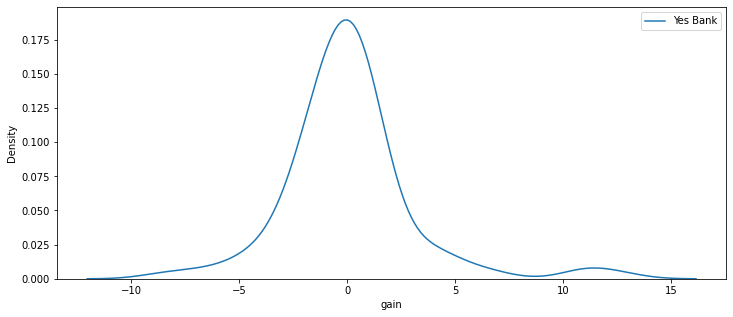

In [ ]:
plt.figure(figsize = (12, 5))
sn.kdeplot(yes_df.gain, label = 'Yes Bank' );
plt.legend();

#### CDF - Cummulative Distribution Function

- CDF is the probability that a random variable (let X) will take a value less than or equal to the random variable (X).

- For example: The probability that the stock will make a loss of -3% or more is the sum of all probabilities of the stocks making -3.0%, -3.1%, -3.2% and so on until highest loss it has encountered historically.

$$\int_{-\infty}^{-3} p(x) \; dx  $$

<img src="https://github.com/manaranjanp/MLCourseV1/blob/main/Session_1/cdf.png?raw=1" alt="Cummulative Distribution Function" width="400"/>

## What is the probability that the stock will make a loss of 3% or more?

### ICICI Bank - probability of a loss of 3% or more

In [ ]:
stats.norm.cdf( -3.0,
               loc=icici_df.gain.mean(),
               scale=icici_df.gain.std())

0.004662082715571748

### Yes Bank - probability of a loss of 3% or more

In [ ]:
stats.norm.cdf( -2.0,
               loc=yes_df.gain.mean(),
               scale=yes_df.gain.std())

0.24436306062835444

#### Note:

- Yes Bank higher probablity compared to ICICI Bank.

## What is the probability that the stock will make a gain of 3% or more?

### ICICI Bank - probability of a gain of 3%

In [ ]:
1 - stats.norm.cdf(3.0,
                   loc=icici_df.gain.mean(),
                   scale=icici_df.gain.std())               

0.0029181203539810907

### Yes Bank - probability of a gain of 3%

In [ ]:
1 - stats.norm.cdf(3.0,
                   loc=yes_df.gain.mean(),
                   scale=yes_df.gain.std())               

0.16529147856226234

#### Note:
- Yes Bank has 16% probability of making a gain of 3% or more.

## Ex1: Participant Exercise

1. Download the daily stock price of four or five randomly selected stocks. The stocks can belong to one sector.

2. Find out the value at risk (Var) of each stock at 95%.

3. Plot the daily gain or loss of all the stocks in one plot.

4. Find out the probability of making 4% gain in each of the stock.

Shivdeep's Solution (March 17, 2023)

In [2]:
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn

Bajaj Auto

In [3]:
bajajauto_df = pd.read_csv( 'https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_1/tatamo-500570.csv', 
                          parse_dates=['Date'] )



In [4]:
bajajauto_df = bajajauto_df.set_index(['Date'], drop=True)

In [5]:
bajajauto_df.head(5)
bajajauto_df.sort_index(ascending = True, inplace=True)

In [6]:
bajajauto_df[-5:]

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2023-03-10,433.85,437.85,431.15,435.75,435.441345,401312,8372,174747837.0,76582.0,19.08,6.70,1.90
2023-03-13,435.00,437.00,419.35,422.40,427.918032,358809,9500,153540841.0,107951.0,30.09,17.65,-12.60
2023-03-14,422.40,424.05,413.55,416.75,418.467356,293547,8543,122839837.0,87533.0,29.82,10.50,-5.65
2023-03-15,421.40,424.75,410.15,411.25,416.573654,571536,17900,238086840.0,255520.0,44.71,14.60,-10.15
2023-03-16,413.50,418.70,405.00,415.65,412.713604,339485,8260,140110078.0,66073.0,19.46,13.70,2.15


In [7]:
bajajauto_df = bajajauto_df[['Close Price', 'Open Price']]

In [8]:
bajajauto_df[0:5]

,Close Price,Open Price
Date,,
2022-10-03,397.65,405.9
2022-10-04,407.95,406.0
2022-10-06,414.00,409.0
2022-10-07,412.20,414.0
2022-10-10,395.95,403.1


In [9]:
bajajauto_df["gain"] = ((bajajauto_df['Close Price'] - bajajauto_df['Open Price']) * 100 / bajajauto_df['Open Price'])

Daily gains/ losses are captured and are added to the same dataframe

In [10]:
bajajauto_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-03,397.65,405.9,-2.032520
2022-10-04,407.95,406.0,0.480296
2022-10-06,414.00,409.0,1.222494
2022-10-07,412.20,414.0,-0.434783
2022-10-10,395.95,403.1,-1.773753


Eicher Motors

In [11]:
eichermotors_df = pd.read_csv( 'https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_1/eicher-motors-505200.csv', 
                       parse_dates=['Date'] )

In [12]:
eichermotors_df =  eichermotors_df.set_index(['Date'], drop=True)

In [13]:
eichermotors_df.sort_index(ascending=True, inplace=True)

In [14]:
# Overwrite DF with only close price and Open Price
eichermotors_df = eichermotors_df[['Close Price', 'Open Price']]

In [15]:
# Calculate daily gains
eichermotors_df["gain"] = ((eichermotors_df['Close Price'] - eichermotors_df['Open Price']) * 100 / eichermotors_df['Open Price'])

In [16]:
eichermotors_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-03,3463.80,3776.00,-8.268008
2022-10-04,3555.00,3549.95,0.142256
2022-10-06,3531.40,3550.05,-0.525345
2022-10-07,3498.60,3531.40,-0.928810
2022-10-10,3532.35,3450.20,2.381021


Mahindra

In [17]:
mahindra_df = pd.read_csv( 'https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_1/m%26m-500520.csv', 
                       parse_dates=['Date'] )

In [18]:
# Set the date column as index
mahindra_df =  mahindra_df.set_index(['Date'], drop=True)

In [19]:
# Sort the date column in place
mahindra_df.sort_index(ascending=True, inplace=True)

In [20]:
# Overwrite DF with only close price and Open Price
mahindra_df = mahindra_df[['Close Price', 'Open Price']]

In [21]:
# Calculate daily gains
mahindra_df["gain"] = ((mahindra_df['Close Price'] - mahindra_df['Open Price']) * 100 / mahindra_df['Open Price'])

In [22]:
mahindra_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-03,1251.50,1266.0,-1.145340
2022-10-04,1259.85,1266.0,-0.485782
2022-10-06,1256.45,1265.0,-0.675889
2022-10-07,1239.25,1256.1,-1.341454
2022-10-10,1243.00,1232.2,0.876481


Maruti Suzuki

In [67]:
maruti_df = pd.read_csv( 'https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_1/maruti-suzuki-532500.csv', 
                       parse_dates=['Date'] )

In [68]:
# Set the date column as index
maruti_df =  maruti_df.set_index(['Date'], drop=True)

In [69]:
# Sort the date column in place
maruti_df.sort_index(ascending=True, inplace=True)

In [70]:
# Overwrite DF with only close price and Open Price
maruti_df = maruti_df[['Close Price', 'Open Price']]

In [71]:
# Calculate daily gains
maruti_df["gain"] = ((maruti_df['Close Price'] - maruti_df['Open Price']) * 100 / maruti_df['Open Price'])

In [72]:
maruti_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-03,8544.40,8950.00,-4.531844
2022-10-04,8687.45,8661.05,0.304813
2022-10-06,8702.25,8744.95,-0.488282
2022-10-07,8782.95,8720.05,0.721326
2022-10-10,8865.55,8704.95,1.844927


Tata Motors

In [29]:
tatamo_df = pd.read_csv( 'https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_1/tatamo-500570.csv', 
                       parse_dates=['Date'] )

In [30]:
# Set the date column as index
tatamo_df =  tatamo_df.set_index(['Date'], drop=True)

In [31]:
# Sort the date column in place
tatamo_df.sort_index(ascending=True, inplace=True)

In [32]:
# Overwrite DF with only close price and Open Price
tatamo_df = tatamo_df[['Close Price', 'Open Price']]

In [33]:
# Calculate daily gains
tatamo_df["gain"] = ((tatamo_df['Close Price'] - tatamo_df['Open Price']) * 100 / tatamo_df['Open Price'])

In [34]:
tatamo_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-03,397.65,405.9,-2.032520
2022-10-04,407.95,406.0,0.480296
2022-10-06,414.00,409.0,1.222494
2022-10-07,412.20,414.0,-0.434783
2022-10-10,395.95,403.1,-1.773753


Plotting Historical Price Trends for Tata Motors



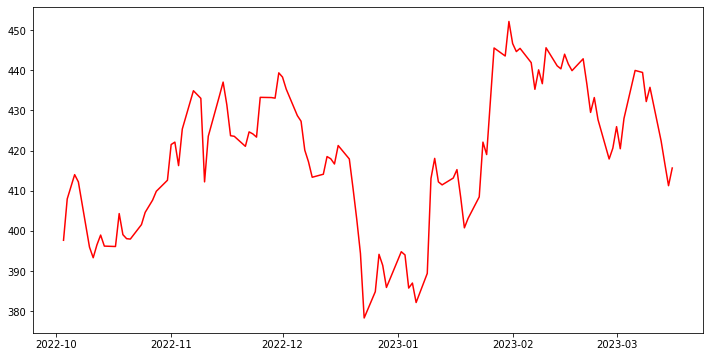

In [35]:
plt.figure(figsize = (12, 6))
# Plot for one of the stocks
plt.plot(tatamo_df['Close Price'], color = 'r');

Plotting Gains for Tata Motors 

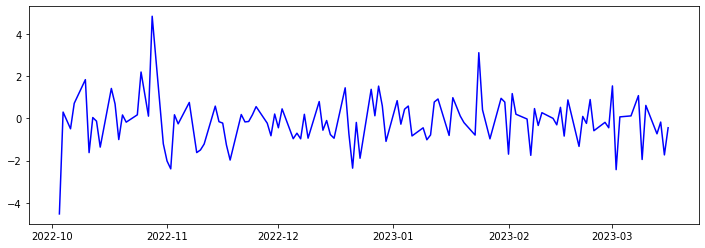

In [36]:
plt.figure(figsize= (12, 4 ))
plt.plot(maruti_df.gain, 'b')

In [37]:
  # Min and max gains for Bajaj Auto
bajajauto_df.gain.min(), bajajauto_df.gain.max()

(-2.999999999999997, 3.443526170798898)

In [38]:
  # Min and max gains for Eicher
eichermotors_df.gain.min(), eichermotors_df.gain.max()

(-8.268008474576266, 3.5285660707588478)

In [39]:
  # Min and max gains for Mahindra
mahindra_df.gain.min(), mahindra_df.gain.max()

(-2.9446086821223068, 3.989499224374535)

In [40]:
# Min and max gains for Maruti
maruti_df.gain.min(), maruti_df.gain.max()

(-4.531843575418998, 4.856202509277265)

In [41]:
  # Min and max gains for Tata Motors
  tatamo_df.gain.min(), tatamo_df.gain.max()

(-2.999999999999997, 3.443526170798898)

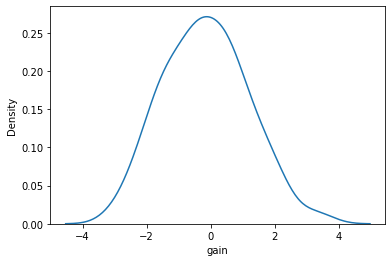

In [42]:
sn.kdeplot(tatamo_df.gain);

Plot all the distribution plots

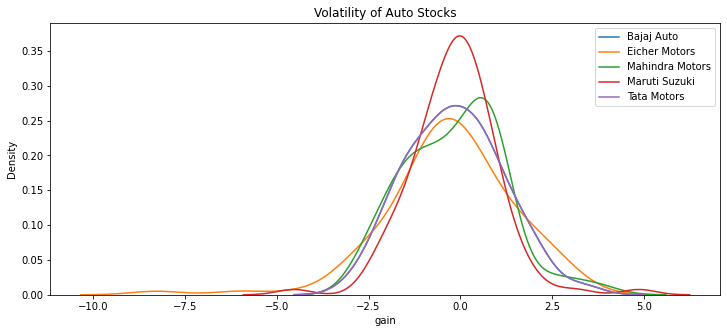

In [44]:
plt.figure(figsize = (12, 5))
sn.kdeplot(bajajauto_df.gain, label = 'Bajaj Auto' );
sn.kdeplot(eichermotors_df.gain, label = 'Eicher Motors' );
sn.kdeplot(mahindra_df.gain, label = 'Mahindra Motors' );
sn.kdeplot(maruti_df.gain, label = 'Maruti Suzuki' );
sn.kdeplot(tatamo_df.gain, label = 'Tata Motors' );

plt.title("Volatility of Auto Stocks")
plt.legend();

Find out the value at risk (Var) of each stock at 95%.


Calculate Mean, SD and Confidence Interval of all the five stocks. 

Confidence Interval is the probability that a parameter will fall between a set of values for a certain proportion of times



In [45]:
from scipy import stats

In [46]:
bajajauto_ci_95 = stats.norm.interval(0.95, loc=bajajauto_df.gain.mean(),scale=bajajauto_df.gain.std())

In [47]:
bajajauto_ci_95

(-2.7375958309910753, 2.4187886560816856)

In [48]:
bajajauto_df[bajajauto_df.gain < bajajauto_ci_95[0]]

,Close Price,Open Price,gain
Date,,,
2022-12-23,378.3,390.0,-3.000000
2023-03-13,422.4,435.0,-2.896552


**VaR - Value At Risk **

*   Value at Risk for Bajaj is 2737.59 rupees
*   Value of Risk for Eicher Motors is 3758.93 rupees
*   Value of Risk for Mahindra is 2839.87
*   Value of Risk for Maruti is 2476.04
*   Value of Risk for Tata Motors is 2737.59

In [49]:
invest_amt = 100000

In [50]:
invest_amt

100000

In [54]:
bajajauto_ci_95[0]

-2.7375958309910753

In [55]:
bajajauto_var = invest_amt * bajajauto_ci_95[0] / 100

Value at risk for 95% CI is 2737.59 rupees, if invested one lakh rupees for day trading in Bajaj Auto.

In [56]:
bajajauto_var

-2737.5958309910757

Value at Risk for Eicher

In [57]:
eicher_ci_95 = stats.norm.interval(0.95, loc=eichermotors_df.gain.mean(),scale=eichermotors_df.gain.std())
eichermotors_df[eichermotors_df.gain < eicher_ci_95[0]]
eichermotors_var = invest_amt * eicher_ci_95[0] / 100
eichermotors_var

-3758.9314957890733

Value at Risk for Mahindra

In [58]:
mahindra_ci_95 = stats.norm.interval(0.95, loc=mahindra_df.gain.mean(),scale=mahindra_df.gain.std())
mahindra_df[mahindra_df.gain < mahindra_ci_95[0]]
mahindra_var = invest_amt * mahindra_ci_95[0] / 100
mahindra_var

-2839.8760493138434

Value at Risk for Maruti

In [74]:
maruti_ci_95 = stats.norm.interval(0.95, loc=maruti_df.gain.mean(),scale=maruti_df.gain.std())
maruti_df[maruti_df.gain < maruti_ci_95[0]]
maruti_var = invest_amt * maruti_ci_95[0] / 100
maruti_var

-2476.0491652008805

Value at Risk for Tata Motors

In [77]:
tata_ci_95 = stats.norm.interval(0.95, loc=tatamo_df.gain.mean(),scale=tatamo_df.gain.std())
tatamo_df[tatamo_df.gain < tata_ci_95[0]]
tata_var = invest_amt * tata_ci_95[0] / 100
tata_var

-2737.5958309910757

Find out the probability of making 4% gain in each of the stock.

Bajaj Auto - Probability of gain of 4%

In [95]:
bajaj_auto_prob = 1 - stats.norm.cdf(4.0, loc=bajajauto_df.gain.mean(), scale=bajajauto_df.gain.std())
bajaj_auto_prob = bajaj_auto_prob * 100
bajaj_auto_prob

0.07834088421596608

Eicher - Probability of gain of 4%

In [102]:
eicher_prob = 1 - stats.norm.cdf(4.0, loc=eichermotors_df.gain.mean(), scale=eichermotors_df.gain.std())
eicher_prob = eicher_prob * 100
eicher_prob

0.7506877899289055

Mahindra - Probability of gain of 4%

In [103]:
mahindra_prob = 1 - stats.norm.cdf(4.0, loc=mahindra_df.gain.mean(), scale=mahindra_df.gain.std())
mahindra_prob = mahindra_prob * 100
mahindra_prob

0.11754980721997432

Maruti - Probability of gain of 4%

In [104]:
maruti_prob = 1 - stats.norm.cdf(4.0, loc=maruti_df.gain.mean(), scale=maruti_df.gain.std())
maruti_prob = maruti_prob * 100
maruti_prob

0.022028173403287887

Tata - Probability of gain of 4%

In [105]:
tata_prob = 1 - stats.norm.cdf(4.0, loc=tatamo_df.gain.mean(), scale=tatamo_df.gain.std())
tata_prob = tata_prob * 100
tata_prob

0.07834088421596608

Find out the probability of making 4% gain in each of the stock.

---

Stock Name & its Probability of a 4% gain

*   Bajaj Auto: 0.07
*   Eicher: 0.75
*   Mahindra: 0.11 
*   Maruti: 0.02
*   Tata Motors: 0.07 


